In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

## Acquire
- read the csv file as a dataframe
- use .describe(), .info(), .shape

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.shape

(378661, 15)

In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
# there are missing values in  name and usd pledged
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [7]:
# what is the count of missing values
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

#### **Takeaways:**
- ***name*** is missing 4 values
- ***usd pledged*** is missing 3797 values
- ***usd pledged*** has a space that should be replaced with an underscore

In [8]:
# What do the 'name' rows with NaN values look like
df[df.name.isna() == True]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [9]:
# every row has a unique ID so we will not be able to figure out the name
df. shape, df.ID.nunique()

((378661, 15), 378661)

In [10]:
# there are 150 row that were successful
(df[df['usd pledged'].isna() == True].state == 'successful').sum()

105

In [11]:
# there are 150 row that failed
(df[df['usd pledged'].isna() == True].state == 'failed').sum()

105

In [14]:
df.head(6)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


#### Notes from acquire and data review
- I do not feel these rows will have a big enough effect on the data, so I plan to drop them
    - name: 4
    - usd_pledged
   
   
- I will rename the column 'usd pledged' to usd_pledged

In [15]:
df.dropna(inplace=True) 

In [16]:
# rename 'usd pledged to usd_pledged 
df.rename(columns={'usd pledged': 'usd_pledged'}, inplace=True)

In [17]:
df.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [18]:
df. shape, df.ID.nunique()

((374860, 15), 374860)

## Prepare
  - narrow scope to just projects that have either succeeded or failed
  - choose a subset of the columns to focus on
  - do a train-test split

In [19]:
# make a new dataframe of only success and failures
success_fail_df = df[(df.state == 'failed') | (df.state == 'successful')]

In [20]:
success_fail_df = success_fail_df[['ID', 'category', 'main_category', 'goal', 'pledged', 'state', 'backers', 'usd_goal_real']]

In [21]:
# do we have any nulls in this dataframe
success_fail_df.isna().sum()

ID               0
category         0
main_category    0
goal             0
pledged          0
state            0
backers          0
usd_goal_real    0
dtype: int64

- we have zero nulls in this dataframe

In [22]:
success_fail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             331462 non-null  int64  
 1   category       331462 non-null  object 
 2   main_category  331462 non-null  object 
 3   goal           331462 non-null  float64
 4   pledged        331462 non-null  float64
 5   state          331462 non-null  object 
 6   backers        331462 non-null  int64  
 7   usd_goal_real  331462 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 22.8+ MB


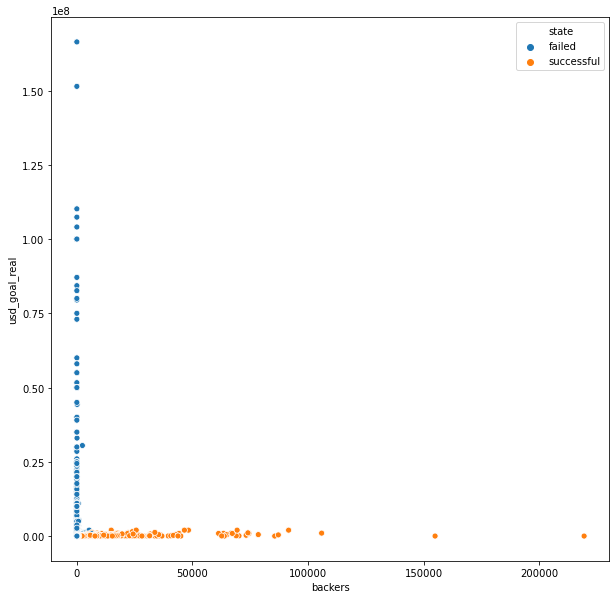

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='backers', y='usd_goal_real', data=success_fail_df, hue='state')

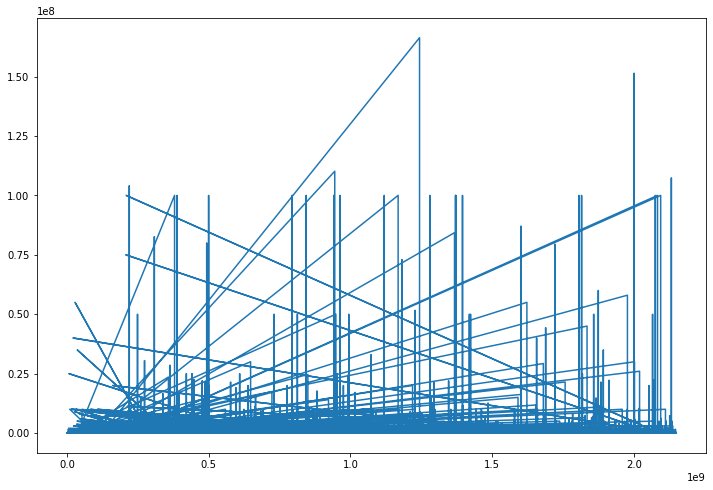

In [24]:
plt.figure(figsize=(12,8))
plt.plot(success_fail_df.ID, success_fail_df.usd_goal_real)

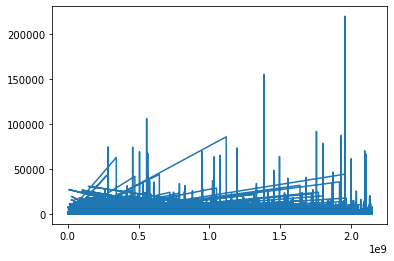

In [25]:
plt.plot(success_fail_df.ID, success_fail_df.backers)

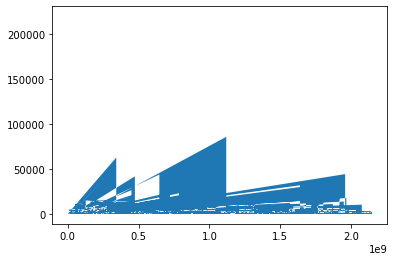

In [26]:
plt.fill(success_fail_df.ID, success_fail_df.backers)

- We nee to convert success and fail to integer values

In [27]:
def label_encoder(traing, test):
    le = LabelEncoder()
    train['state'] = le.fit_transform(train.state)
    test['state'] = le.transform(test.state)
    return le, train, test

In [28]:
train, test = train_test_split(success_fail_df, train_size=.75, random_state=123)

In [29]:
le, train, test = label_encoder(train, test)

> For state: success = 1, failure = 0

In [30]:
train.head(13)

,ID,category,main_category,goal,pledged,state,backers,usd_goal_real
251268,348145816,Woodworking,Crafts,4000.0,0.0,0,0,3070.07
88038,1447519911,Music,Music,6000.0,100.0,0,1,6000.00
245772,319969265,Children's Books,Publishing,11000.0,12673.0,1,148,11000.00
330392,753171907,Art,Art,2750.0,0.0,0,0,2750.00
261697,40102004,Photography,Photography,300.0,35.0,0,2,422.26
12484,1062641038,Festivals,Theater,1000.0,81.0,0,6,1315.41
105648,1537029363,Children's Books,Publishing,6000.0,111.0,0,1,6000.00
41605,1211853542,Crafts,Crafts,5000.0,321.0,0,3,5000.00
98282,1498903916,Nonfiction,Publishing,750.0,0.0,0,0,750.00
372802,969866972,Nonfiction,Publishing,6400.0,2012.0,0,41,6400.00


In [31]:
test.head(12)

,ID,category,main_category,goal,pledged,state,backers,usd_goal_real
214241,2091654583,Illustration,Art,100.0,0.0,0,0,154.75
35701,1181101973,Shorts,Film & Video,2500.0,2707.0,1,36,2500.00
157795,180265318,Software,Technology,25000.0,2.0,0,2,33969.24
119222,1605681436,Webseries,Film & Video,50000.0,4339.0,0,48,50000.00
81855,141618599,Product Design,Design,2250.0,2577.0,1,64,2250.00
73490,1374362223,Shorts,Film & Video,500.0,32.0,0,3,791.69
167739,1853307250,Documentary,Film & Video,1500.0,222.0,0,9,1500.00
32770,1166481953,Photography,Photography,850.0,1457.0,1,45,850.00
99974,1507768183,Music,Music,50000.0,381.0,0,12,65475.02
30634,1155808900,Classical Music,Music,5000.0,1150.0,0,10,5000.00


- let's scale some of the columns so we can see the data better

In [32]:
def scale_columns(train, test):
    scaler = MinMaxScaler()
    train[['goal','pledged', 'usd_goal_real', 'backers']] = scaler.fit_transform(train[['goal','pledged', 'usd_goal_real', 'backers']])
    test[['goal','pledged', 'usd_goal_real', 'backers']] = scaler.transform(test[['goal','pledged', 'usd_goal_real', 'backers']])
    return scaler, train, test

In [33]:
scaler, train, test = scale_columns(train, test)

In [34]:
train

,ID,category,main_category,goal,pledged,state,backers,usd_goal_real
251268,348145816,Woodworking,Crafts,0.000040,0.000000,0,0.000000,0.000018
88038,1447519911,Music,Music,0.000060,0.000005,0,0.000005,0.000036
245772,319969265,Children's Books,Publishing,0.000110,0.000623,1,0.000675,0.000066
330392,753171907,Art,Art,0.000027,0.000000,0,0.000000,0.000017
261697,40102004,Photography,Photography,0.000003,0.000002,0,0.000009,0.000003
...,...,...,...,...,...,...,...,...
219921,2120159818,Journalism,Journalism,0.000040,0.000038,0,0.000064,0.000024
20211,11027462,Food,Food,0.000050,0.000000,0,0.000000,0.000030
31960,116247320,Dance,Dance,0.000025,0.000159,1,0.000123,0.000015
317365,686703034,Music,Music,0.000200,0.001004,1,0.000871,0.000120


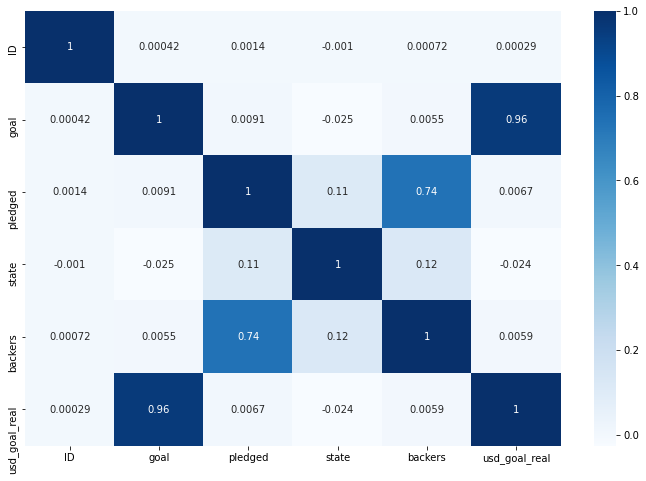

In [35]:
# Overall correlation of the features and the target.
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

## Explore

- Hypothesis
- visuals
- stats

### Hypothesis:

- $H_0:$ Category and number of backers are related.
- $H_a:$ Category and number of backers are not related.

In [36]:
def get_cat_backer_visual(df):
    plt.figure(figsize=(16,8))
    sns.swarmplot(x="category", y="backers", data=df)
    plt.xlabel("Kickstarter Category")
    plt.ylabel("# of Backers")
    plt.show()   

In [ ]:
get_cat_backer_visual(train)

In [ ]:
    
# Explore stats

# Age of Sewer
def age_stats(df, alpha):
    root_cause_values = df.root_cause.value_counts()
    root_cause_list = root_cause_values.index.to_list()
    overall_age = df.age.mean()

    print('\n\nHypothesis Testing:')
    print(f'H_null: The age of the sewer is not correlated as the cause of the pipe damage involving a root_cause.')
    print(f'H_alt: The age of the sewer is correlated as the cause of the pipe damage involving a root cause.')

    root_causes = ''
    for l in root_cause_list:
        root_causes += f'{l}, '
    print(f'\nRoot Causes: \n\t{root_causes}\n')

    related_list = []
    not_related_list = []
    plot_list = []
    related_list.append("We reject the null hypothesis that the age of the sewer is not correlated as the cause of the pipe damage invloving: \n")
    not_related_list.append("We fail to reject the null hypothesis that the age of the sewer is not correlated as the cause of the pipe damage invloving: \n")

    for l in root_cause_list:
        if l != 'by pass pump leak':
            i = df[df.root_cause == l].age
            t, p = stats.ttest_1samp(i, overall_age)
        
            if p < alpha:
                related_list.append(' {} with an alpha of {:.2f} and a p-value of {}:'.format(l, alpha, p))
                plot_list.append()
            
            else:
                not_related_list.append(' {} with an alpha of {:.2f} and a p-value of {}:'.format(l, alpha, p))
            
    for r in related_list:
        print(r)
    print('-'*100)
    for n in not_related_list:
        print(n)